In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

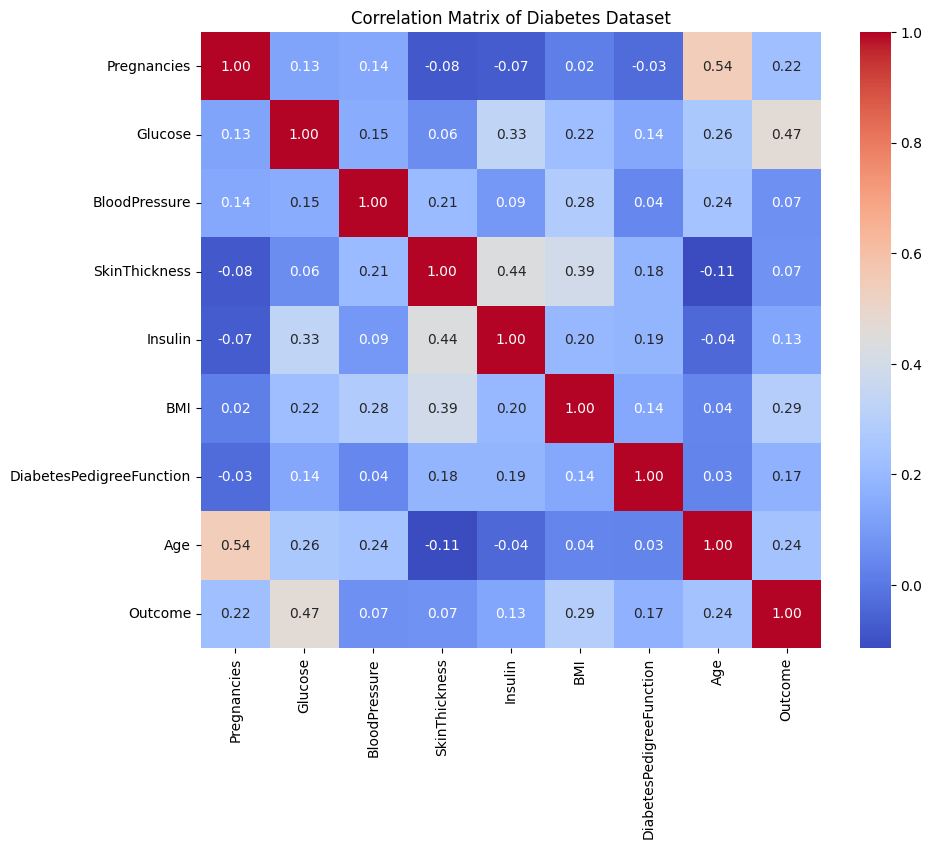

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Diabetes Dataset')
plt.show()

In [55]:
# 데이터셋 인스턴스 생성
df = pd.read_csv('/content/drive/MyDrive/diabetes.csv')  # CSV 파일 경로

In [56]:
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [57]:
# 데이터와 타겟 분리
# Select only the desired columns for X using the 'columns' variable
X = df[columns].values
y = df['BMI'].values

In [58]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [59]:
# Defining the model with corrected input shape
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(8, input_shape=(6,), activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(1))

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_40 (Dense)                │ (None, 8)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 30)             │           270 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,287 (5.03 KB)

 Trainable params: 1,287 (5.03 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
N_EPOCHS = 10

history=model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2047.4688 - mse: 2047.4688 - val_loss: 260.4215 - val_mse: 260.4215
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 214.1651 - mse: 214.1651 - val_loss: 90.7513 - val_mse: 90.7513
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 101.8652 - mse: 101.8652 - val_loss: 106.7539 - val_mse: 106.7539
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 78.2276 - mse: 78.2276 - val_loss: 79.9347 - val_mse: 79.9347
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 64.6472 - mse: 64.6472 - val_loss: 65.5066 - val_mse: 65.5066
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 60.6695 - mse: 60.6695 - val_loss: 124.8119 - val_mse: 124.8119
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 71.1847 - mse: 71.1847 - val_loss: 54.9466 - val_mse: 54.9466
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 55.0350 - mse: 55.0350 - val_loss: 57.3933 - val_mse: 57.3933
Epoch 9/10
20/20 ━━━━━━━━

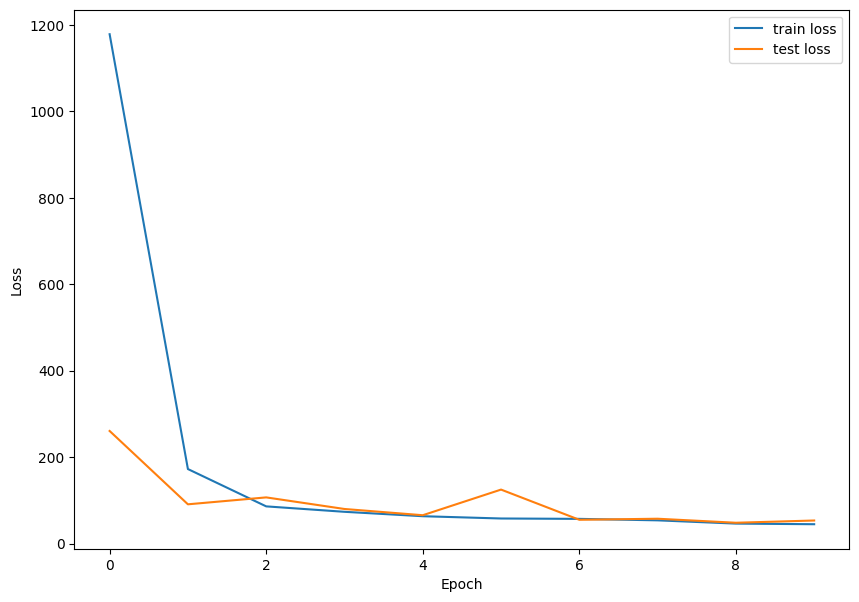

In [61]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [62]:
model.evaluate(X_test, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 54.3084 - mse: 54.3084 


[53.275962829589844, 53.275962829589844]